In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Esta notebook es un primer boceto de lo que habría que hacer.
  Ojo con el nombre de las series que se me pudo haber escapado algo de los ejemplos.
  
  Tener en cuenta la creación de nuestras X e y. 
  
  En el modelo Naive Bayes Multinomial la mayoría de los ejemplos es con clasificador de texto.
  
  Ojo  con la estandarización de aplicarlo al set de entreamiento y llevar esa transformación al de testeo.

## Cargar el data set

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('df_ecobicis_final.csv')


In [3]:
df.sample(10)


,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,barrio_origen,comuna_origen,barrio_destino,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario
1965714,1965714,473978,2018-10-06 00:45:28,9,Armenia y Gorriti,142,Guatemala,113,M,28,...,PALERMO,14,PALERMO,14,0,SABADO,BAJO,0,PRIMAVERA,0-5
2198270,2198270,339292,2018-10-31 17:44:29,11,Pacífico,14,Armenia,123,M,29,...,PALERMO,14,PALERMO,14,0,MIERCOLES,BAJO,17,PRIMAVERA,12-17
625287,625287,84615,2018-05-14 13:38:01,14,Costa Rica,122,Pueyrredón,144,M,39,...,PALERMO,14,BALVANERA,3,0,LUNES,BAJO,13,OTOÑO,12-17
754784,754784,476315,2018-05-29 09:39:41,19,Instituto Leloir,74,Coronel Díaz,59,M,27,...,CABALLITO,6,PALERMO,14,0,MARTES,BAJO,9,OTOÑO,6-11
1734132,1734132,366570,2018-09-15 16:34:00,18,Instituto Leloir,74,Lerma,109,F,21,...,CABALLITO,6,VILLA CRESPO,15,0,SABADO,BAJO,16,INVIERNO,12-17
352489,352489,455882,2018-04-02 18:31:04,147,Plaza Primero de Mayo,75,Plaza Primero de Mayo,75,M,31,...,BALVANERA,3,BALVANERA,3,1,LUNES,EXCEDIDO,18,OTOÑO,18-23
2686094,2686094,584430,2019-01-23 01:43:42,14,Ayacucho,76,Independencia,18,M,36,...,BALVANERA,3,MONSERRAT,1,0,MIERCOLES,BAJO,1,VERANO,0-5
620804,620804,517420,2018-05-13 21:09:56,51,Humberto 1º,117,Reconquista,63,F,30,...,SAN TELMO,1,SAN NICOLAS,1,0,DOMINGO,MEDIO,21,OTOÑO,18-23
275367,275367,349611,2018-03-12 23:48:21,12,Julián Álvarez,65,Peña,30,M,24,...,PALERMO,14,RECOLETA,2,0,LUNES,BAJO,23,VERANO,18-23
45369,45369,100735,2018-01-13 12:03:54,108,Plaza Monseñor Miguel De Andrea,165,Parque Las Heras,9,M,61,...,RECOLETA,2,PALERMO,14,0,SABADO,ALTO,12,VERANO,12-17


## Revisar las columnas que tenemos para determinar las variables a usar, la creación de las varibales dummies y la eliminación de variables redundantes

In [4]:
df.columns

Index(['Unnamed: 0', 'bici_id_usuario', 'bici_Fecha_hora_retiro',
       'bici_tiempo_uso', 'bici_nombre_estacion_origen',
       'bici_estacion_origen', 'bici_nombre_estacion_destino',
       'bici_estacion_destino', 'bici_sexo', 'bici_edad', 'fecha', 'hora',
       'dia_semana', 'barrio_origen', 'comuna_origen', 'barrio_destino',
       'comuna_destino', 'feriado', 'dia', 'uso_categorico', 'hora_simple',
       'estacion_agno', 'rango_horario'],
      dtype='object')

In [5]:
#Revisando valores nulos
df.isnull().sum()

Unnamed: 0                      0
bici_id_usuario                 0
bici_Fecha_hora_retiro          0
bici_tiempo_uso                 0
bici_nombre_estacion_origen     0
bici_estacion_origen            0
bici_nombre_estacion_destino    0
bici_estacion_destino           0
bici_sexo                       0
bici_edad                       0
fecha                           0
hora                            0
dia_semana                      0
barrio_origen                   0
comuna_origen                   0
barrio_destino                  0
comuna_destino                  0
feriado                         0
dia                             0
uso_categorico                  0
hora_simple                     0
estacion_agno                   0
rango_horario                   0
dtype: int64

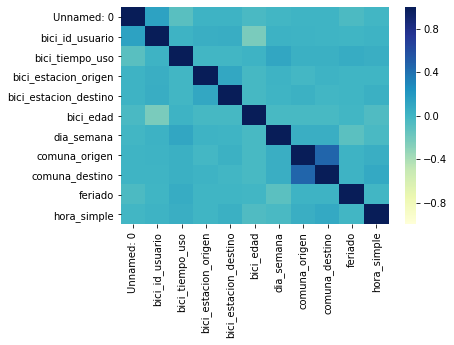

In [6]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [7]:
#Generando variables dummies
dummies_dia = pd.get_dummies(df.dia, prefix=None, prefix_sep='_', drop_first=True)
dummies_sexo=pd.get_dummies(df.bici_sexo, prefix=None, prefix_sep='_', drop_first=True)
dummies_origen=pd.get_dummies(df.bici_nombre_estacion_origen, prefix=None, prefix_sep='_', drop_first=True)
dummies_comuna=pd.get_dummies(df.comuna_origen, prefix='comuna', prefix_sep='_', drop_first=True)
dummies_estacion_agno=pd.get_dummies(df.estacion_agno, prefix=None, prefix_sep='_', drop_first=True)
dummies_rango=pd.get_dummies(df.rango_horario, prefix=None, prefix_sep='_', drop_first=True)


In [8]:
#Concatenamos los df de las dummies
df=pd.concat([df,dummies_sexo,dummies_dia,dummies_comuna,dummies_rango,dummies_origen,dummies_estacion_agno], axis=1)

In [9]:
df.head()

,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,0,5453,2018-01-01 00:08:05,19,Uruguay,45,Virrey Cevallos,183,M,45,...,0,0,0,0,0,0,0,0,0,1
1,1,673,2018-01-01 00:18:05,26,Posadas,189,Guardia Vieja,110,M,61,...,0,0,0,0,0,0,0,0,0,1
2,2,179119,2018-01-01 00:20:14,27,Hospital Rivadavia,50,Padilla,31,F,52,...,0,0,0,0,0,0,0,0,0,1
3,3,400147,2018-01-01 00:20:22,48,Macacha Güemes,111,Acuña de Figueroa,54,M,27,...,0,0,0,0,0,0,0,0,0,1
4,4,400156,2018-01-01 00:20:31,49,Macacha Güemes,111,Acuña de Figueroa,54,F,27,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#Dropear las features redundantes o que no necesitamos
df = df.drop(['barrio_destino'], axis=1)
df = df.drop(['barrio_origen'], axis=1)
df = df.drop(['bici_nombre_estacion_destino'], axis=1)
df = df.drop(['bici_nombre_estacion_origen'], axis=1)
df = df.drop(['dia'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['bici_id_usuario'], axis=1)
df=df.drop(['bici_Fecha_hora_retiro'], axis=1)
df=df.drop(['bici_estacion_origen'], axis=1)
df=df.drop(['bici_estacion_destino'], axis=1)
df=df.drop(['fecha'], axis=1)
df=df.drop(['dia_semana'], axis=1)
df=df.drop(['bici_sexo'], axis=1)
df=df.drop(['comuna_destino'], axis=1)
df=df.drop(['hora'], axis=1)
df=df.drop(['estacion_agno'], axis=1)
df=df.drop(['rango_horario'], axis=1)
df=df.drop(['bici_tiempo_uso'], axis=1)



df.head()

,bici_edad,comuna_origen,feriado,uso_categorico,hora_simple,M,N,JUEVES,LUNES,MARTES,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,45,1,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,61,2,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,52,14,1,BAJO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,27,1,1,MEDIO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,27,1,1,MEDIO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Para Entrenamiento
df_bajo_E = df.loc[(df['uso_categorico']=='BAJO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 5)
df_medio_E = df.loc[(df['uso_categorico']=='MEDIO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 15)
df_alto_E = df.loc[(df['uso_categorico']=='ALTO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 25)
df_excedido_E = df.loc[(df['uso_categorico']=='EXCEDIDO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 35)

In [12]:
df_balance = pd.concat([df_bajo_E, df_medio_E, df_alto_E,  df_excedido_E])

In [13]:
y_train=df_balance['uso_categorico']

In [14]:
X_train=df_balance.drop(['uso_categorico'], axis=1)

In [15]:
df_test = df.loc[(df['uso_categorico'].index % 2 == 1),:].sample(200000, random_state= 5)

In [16]:
y_test=df_test['uso_categorico']

In [17]:
X_test=df_test.drop(['uso_categorico'], axis=1)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [21]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=5, multi_class='one_vs_one')

In [22]:
gpc.fit(X_train, y_train)

MemoryError: 

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.cv_results_.keys()

In [ ]:
pd.DataFrame(gs.cv_results_).columns

In [ ]:
pd.DataFrame(gs.cv_results_)

In [ ]:
gs.best_estimator_, gs.best_score_, gs.best_params_

In [ ]:
## Leer la ayuda, porque vamos a tener que aplicar algunos de estos:
## 'newton-cg', 'sag', 'saga' and 'lbfgs' en el hiperparémtro SOLVER.
## Cuando hagamos el grid le decimos que lo intente con cada uno.

lg = linear_model.LogisticRegression()

lg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train_scaled)

y_pred_test = lg.predict(X_test_scaled)

In [ ]:
# Elaboramos la matriz de confusión:

confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [ ]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test)

In [ ]:
lg.predict(X_test_scaled)

In [ ]:
lg.predict_proba(X_test_scaled)

#### Con este modelo de Regresión Logística multiclase, tendríamos que investigar la
#### interpreatbilidad de los resultados, ya que no lo vimos en clases.

# Naive bayes

In [ ]:
#### Entrenamiento de un clasificador Naive Bayes

#Con la matriz construída para los datos de entrenamiento vamos a entrenar un clasificador 
#utilizando el modelo MultinomialNaiveBayes()

#Igual que el modelo anterior hay que leer la ayuda para instanciarlo como multiclases.
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()


In [ ]:
modelo_NB.fit(X_train, y_train)


In [ ]:

#### Predicción

# Con los features de test transformados calculamos las labels predichas
y_predict_mnb = modelo_NB.predict(X_test)


In [ ]:


#### Matriz de confusión

A continuación graficamos una matriz de confusión entre lo predicho y las verdaderas labels en test

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_mnb)

In [ ]:
# Ahora calculamos la matriz de confusión
mat = confusion_matrix(y_test, y_predict_mnb)
mat.shape
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas');

In [ ]:
##########
#OTRA FORMA DE GENERAR LA MATRIZ DE CONFUSIÓN

plot_confusion_matrix(y , y_predict_mnb, classes=#COLOCAR EL ARRAY DE LAS CLASES QUE TENEMOS EN Y#np.array(['W','N1','N2','N3']),title='Confusion Matrix',normalize=True)
plt.show()

# Métricas 

#### Hay que ver si ponemos esto en una función y/o en un pipeline para tener la comparación de estas métricas

In [ ]:
### 2.5 Métricas computadas desde la matriz de confusión: Classification Error

Es, básicamente, el complemento de accuracy. Cuantifica el error total cometido por el clasificador:



print(class_error)


In [ ]:
### 2.6 Métricas computadas desde la matriz de confusión: Sensitivity (o recall)

Mide la capacidad (qué tan "sensible" es) del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (FN + TP). En nuestro ejemplo: del total de personas que se van, ¿cuántas logra clasificar correctamente el modelo?

from sklearn.metrics import recall_score



print(recall_score(y_test, y_pred))

In [ ]:


### 2.7 Métricas computadas desde la matriz de confusión: Specificity

Mide la capacidad de detectar los "verdaderos negativos" (TN) sobre el total de casos que son negativos (TN + FP). ¿Qué tan específico o selectivo es el modelo al predecir las instancias positivas?

specificity = TN / (TN + FP)

print(specificity)


In [ ]:

### 2.8 Métricas computadas desde la matriz de confusión: Precision

Mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Es decir, cuando el clasificador predice un valor positivo... ¿qué tan frecuentemente es esta predicción correcta?

from sklearn.metrics import precision_score

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred))

In [ ]:
### 2.9 Métricas computadas desde la matriz de confusión: F1-Score

Es un promedio armónimo entre precision y recall.

from sklearn.metrics import f1_score

f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))
